In [0]:
import pandas as pd

df = pd.read_csv('vgsales.csv')

In [9]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Uncategorized,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [11]:
df.shape

(16598, 11)

In [0]:
import plotly.express as px
import plotly

This graph shows us the number of sales from 1980 to 2016. This dataset only includes the sales of Hardcopies of video games sales i.e. Cds and DVDs, hence we a drop in sales after 2009, since the games were sold on cloud as well as Hardcopies

In [30]:
fig = px.bar(df_year, y='Sales in million', x='Year', text='Sales in million')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title="Game Sales in Million $ by Year",xaxis_title="Years",
    yaxis_title="Total Sales in $")



fig.show()

This graph shows us the which genre sold the most number of games. An interesting category is the Misc. which include games like Deal or No Deal,  games related to astrology etc. 

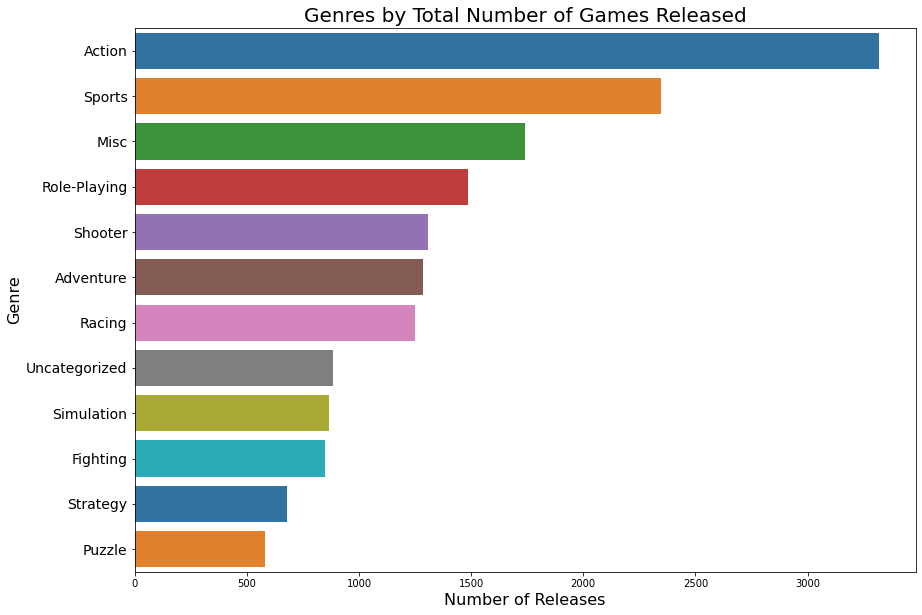

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


#counting the first col
releases_per_year = df.groupby(['Genre']).count().iloc[:,0]
#Arranging in ascending order
releases_per_year = pd.DataFrame(releases_per_year.sort_values(ascending=False))
genres = releases_per_year.index
releases_per_year.columns = ['Releases']

# colors = sns.color_palette(sns.palplot(sns.cubehelix_palette(len(releases_per_year))))
plt.figure(figsize=(14,10))
ax = sns.barplot(y = genres , x = 'Releases', data=releases_per_year, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Number of Games Released', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

The following graph shows us the revenue generated by genre of games

In [32]:
total_revenue_df = df.groupby(['Genre'])['Global_Sales'].sum()

total_revenue_df = pd.DataFrame(total_revenue_df.sort_values(ascending=False))
genres = total_revenue_df.index
total_revenue_df.columns = ['Revenue']

fig = px.bar(total_revenue_df, y='Revenue', x=genres,color='Revenue')

fig.update_layout(title=" Revenue Generated per Genre in million $",xaxis_title="Genre of Game",
    yaxis_title="Total Revenue")

fig.show()

The following graph shows us which genres dominated i.e. the top selling genre of the year

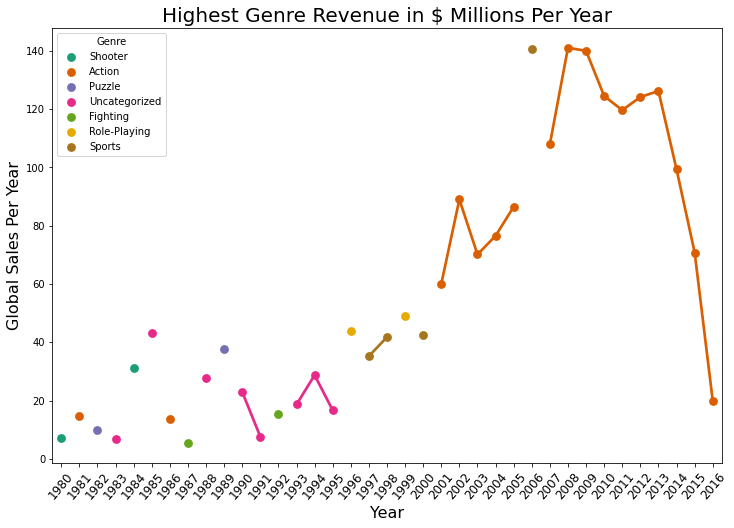

In [33]:
table = df.pivot_table('Global_Sales', index='Genre', columns='Year', aggfunc='sum')
genres = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([genres, sales], axis=1)
data.columns = ['Genre', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Genre', data=data, size=15, palette='Dark2')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Genre Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

Top 10 publishers of games

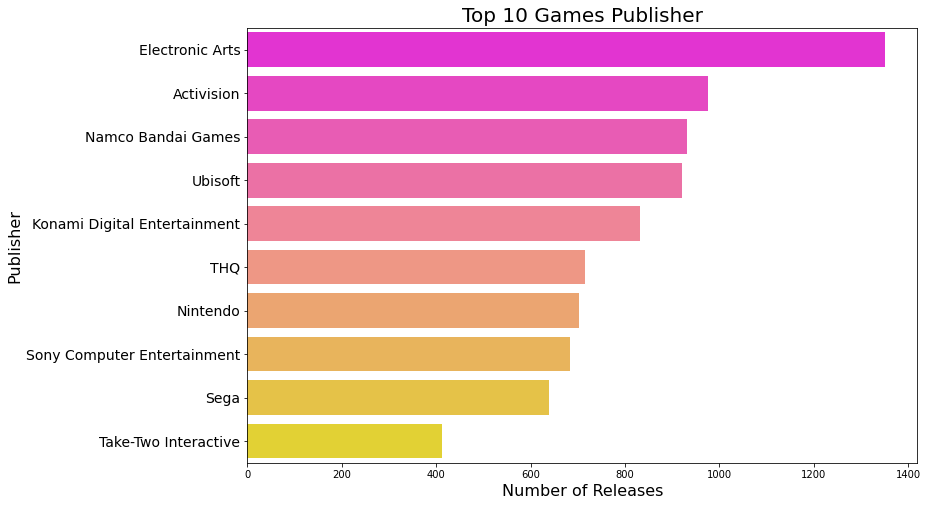

In [34]:
data = df.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Releases']

colors = sns.color_palette("spring", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Games Publisher', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

Top 3 genres in United states, Japan and Europe

In [0]:
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)

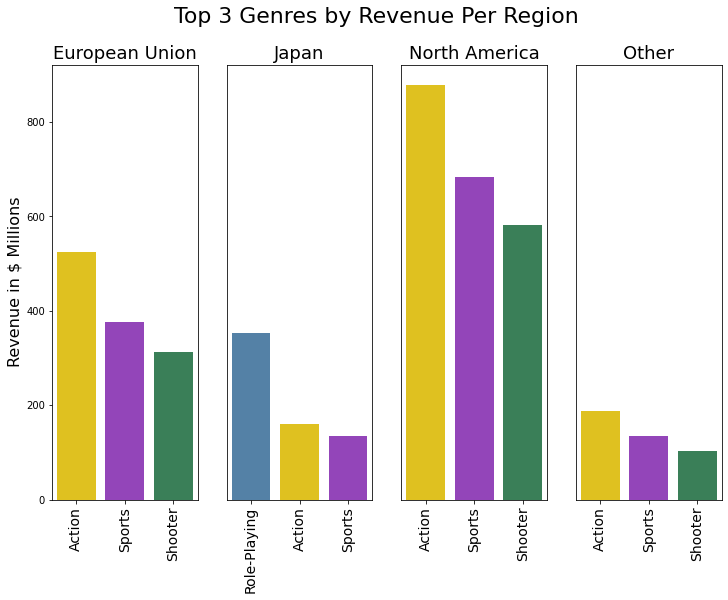

In [36]:
EU = df.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_genres = EU.index

JP = df.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_genres = JP.index

NA = df.pivot_table('NA_Sales', columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_genres = NA.index

Other = df.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_genres = Other.index

colors =  {'Action':"gold", 'Sports':"darkorchid", 'Shooter':"seagreen", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_genres, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_genres, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_genres, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_genres, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();